In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('test_images/test6.png',0)
#img = cv2.blur(img, (2,1))
_, thresh = cv2.threshold(img, 130, 255, 0)
img = cv2.bitwise_not(thresh)

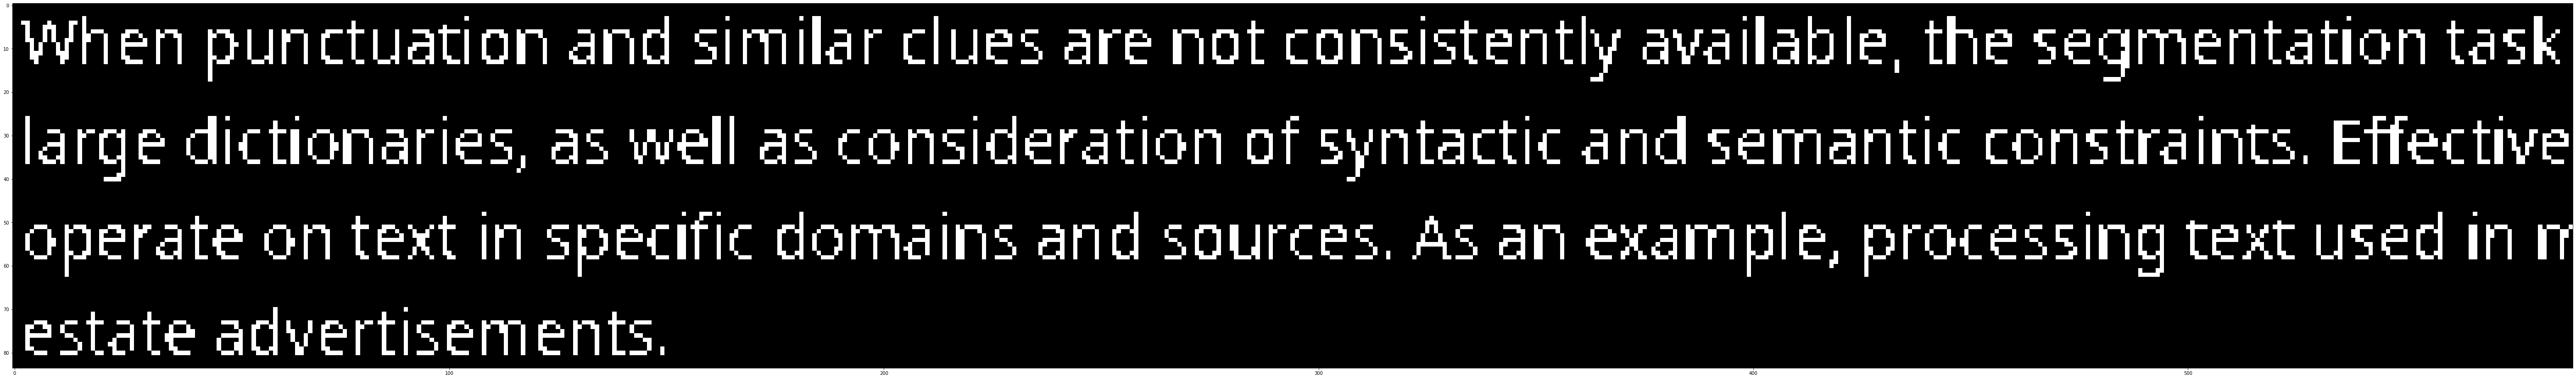

In [3]:
fig = plt.figure(figsize=(100,20))
plt.imshow(img, cmap='gray')
plt.show()

In [14]:
def create_projection(image, method) -> list:
    index1 = 1 if method == 'v' else 0
    index2 = abs(1-index1) 
    hist = np.zeros(image.shape[index1])
    for y in range(image.shape[index1]):
        for x in range(image.shape[index2]):
            temp = image[x,y] if method == 'v' else image[y,x]
            hist[y] += temp
    hist /= image.shape[index2]
    return hist

def create_lines(hist, threshold) -> list:
    lines = []
    gap = []
    for i, val in enumerate(hist):
        if val <= threshold:
            gap.append(i)
        else:
            if gap:
                avg = sum(gap)//len(gap)
                lines.append(avg)
                gap = []
    if gap:
        avg = sum(gap)//len(gap)
        lines.append(avg)               
    return lines

def split_image(image, lines, method):
    img = []
    try:
        for i,l in enumerate(lines):
            pos1 = lines[i]
            pos2 = lines[i+1]
            temp = image[pos1: pos2] if method =='h' else image[:,pos1:pos2]
            img.append(temp)
    except IndexError:
            pass
    return img 

In [5]:
hist = create_projection(img, method='h')
lines = create_lines(hist, 0)

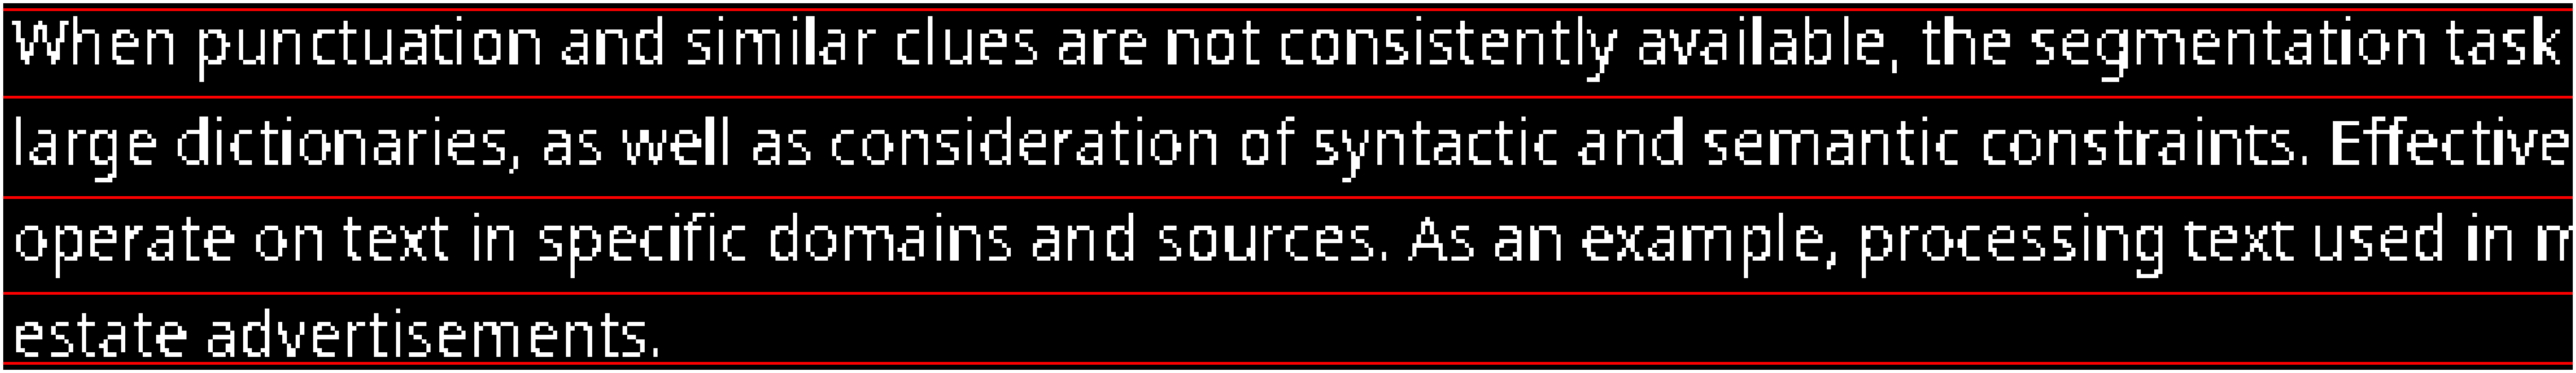

In [6]:
fig = plt.figure(figsize=(100,100))
plt.imshow(img, cmap='gray')
for l in lines:
    plt.axhline(y=l,c='r', linewidth=6)
plt.axis('off')
plt.show()

In [7]:
splited_img = split_image(img, lines, method='h')

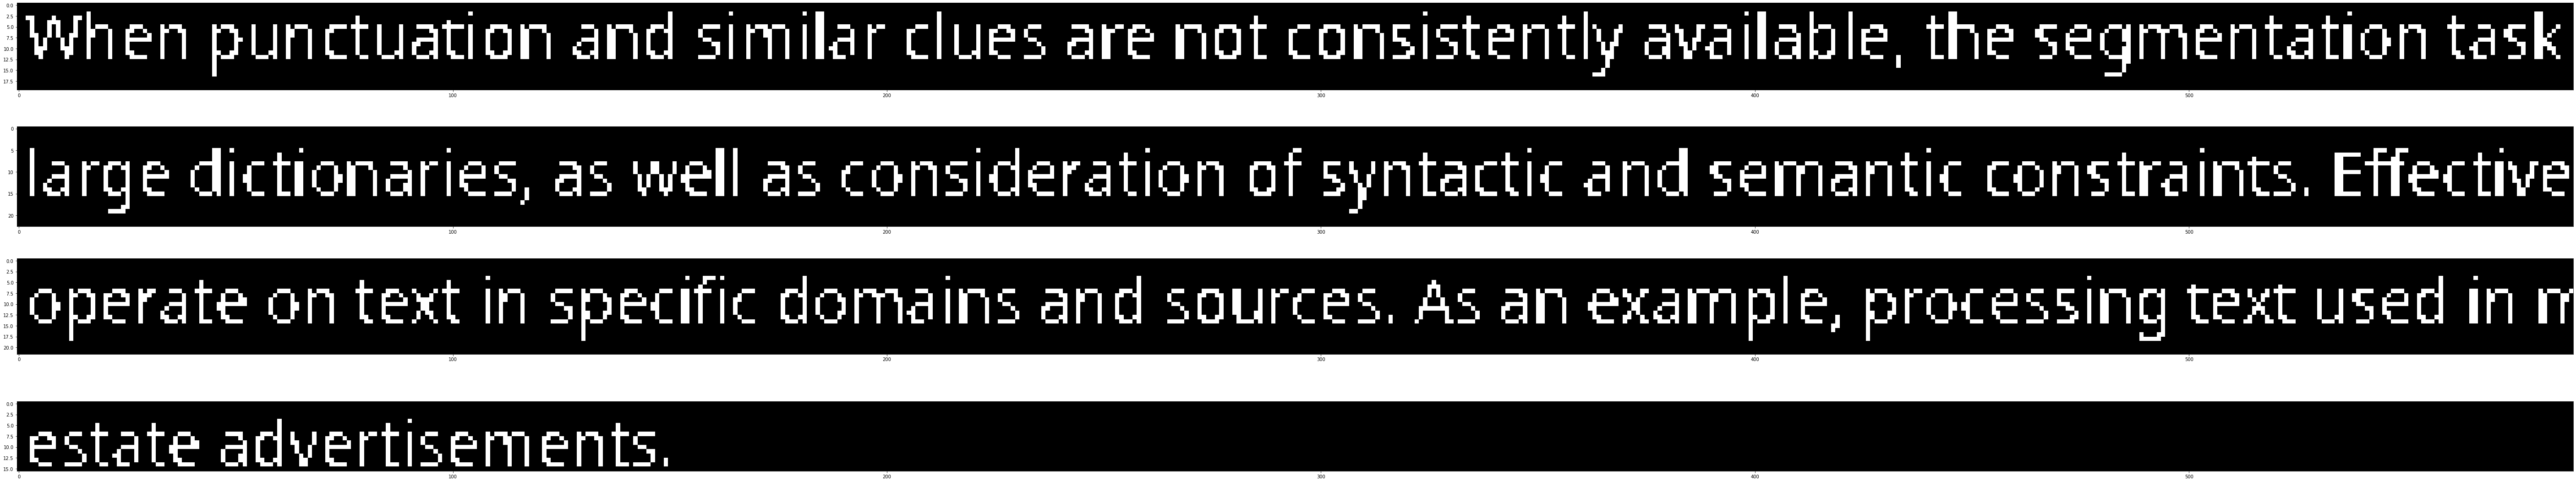

In [8]:
fig = plt.figure(figsize=(100,20))
row = len(splited_img)
col = 1
for i,img in enumerate(splited_img):
    fig.add_subplot(row, col, i+1)
    plt.imshow(img, cmap='gray')

In [9]:
img = splited_img[0]

In [10]:
hist = create_projection(img, method = 'v')
lines = create_lines(hist, 0)

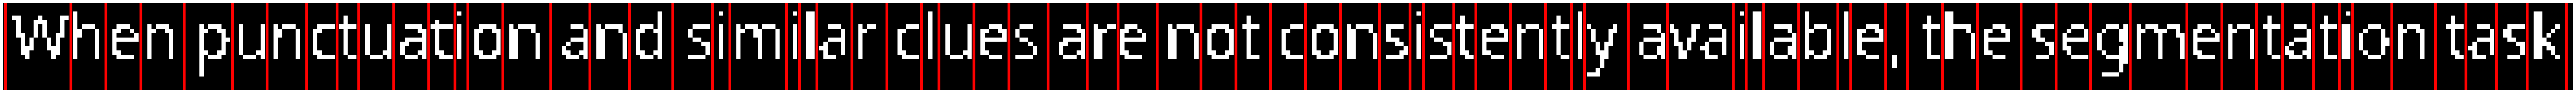

In [11]:
fig = plt.figure(figsize=(100,100))
plt.imshow(img, cmap='gray')
for l in lines:
    plt.axvline(x=l,c='r', linewidth=6)
plt.axis('off')
plt.show()

In [12]:
splited_img = split_image(img, lines, method='v')

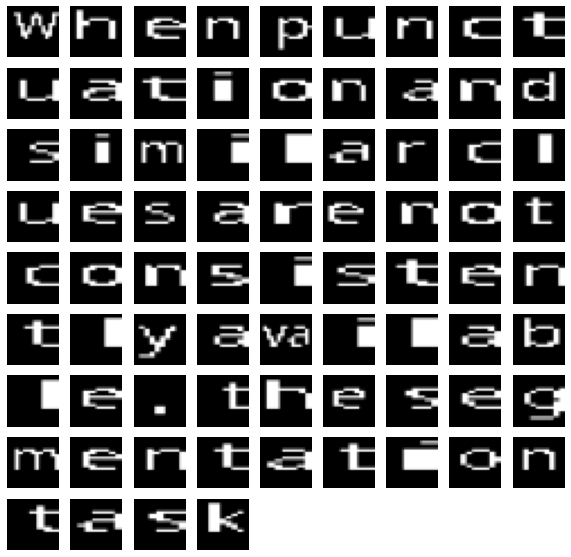

In [13]:
row, col = 9, 9
fig = plt.figure(figsize=(10,10))
for i in range(1, row*col+1):
    try:
        img = splited_img[i-1]
        img = cv2.resize(img,(23,23), interpolation = cv2.INTER_AREA)
        fig.add_subplot(row, col,i)
        plt.axis('off')
        plt.imshow(img, cmap='gray')
    except IndexError:
        pass